In [52]:
import pylab as pl
import numpy as np

import matplotlib.pyplot as plt

from astropy.table import Table

In [40]:
raw = Table.read('/global/cscratch1/sd/mjwilson/secondary/sv1/raw/Mar21/LBG_TOMOG.fits')

In [41]:
raw.pprint()

   ID           RA                DEC         TRACT  ... H_ERR     KS   KS_ERR
------- ------------------ ------------------ ------ ... ------ ------- ------
3426047 148.62842937293067  1.899344914451632   9812 ... 1000.0 -99.009 1000.0
1679067 150.06060084735097 0.9829921500761322   9570 ... 1000.0 -99.007 1000.0
1305526 151.13754332142085 3.3309280055952293  10056 ... 1000.0 -99.007 1000.0
2546665  150.9758603861766  1.481545368059068   9571 ... 1000.0 -99.008 1000.0
3516536 151.05351139604605  1.888729166185786   9813 ... 1000.0 -99.009 1000.0
3740273 150.86444500749957   2.48046384099863   9813 ...  -99.0 -99.007  -99.0
2796173 149.49237560516423 1.9732780253402424   9812 ...  0.014   22.48  0.015
2594081  150.8204966987836  1.098884428057212   9571 ... 1000.0 -99.008 1000.0
 803357 150.33642365858782 3.0302709692351013  10055 ... 1000.0 -99.006 1000.0
 137452 149.34394337968587  3.439731890612805  10054 ... 1000.0  -99.01 1000.0
    ...                ...                ...    ...

In [16]:
# raw.dtype.names

In [45]:
types = np.unique(raw['SAMPLE'])

In [46]:
types

CLAUDS-BX
CLAUDS-G
CLAUDS-TMG
CLAUDS-U


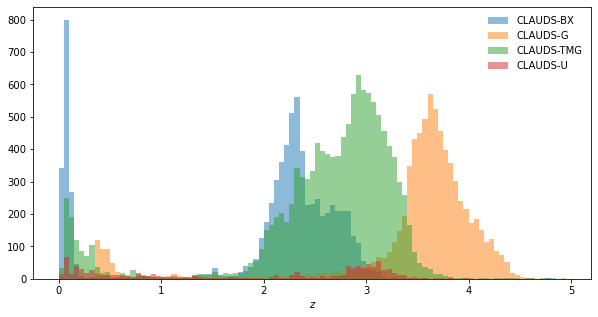

In [47]:
fig, axes = plt.subplots(1, 1, figsize=(10., 5.))
    
dz   = 0.05
bins = np.arange(0.0, 5.0, dz)

for ss in types:
    isin = raw['SAMPLE'] == ss
    
    axes.hist(raw['Z_BC03'][isin], bins=bins, alpha=0.5, label=ss)

axes.set_xlabel(r'$z$')
axes.legend(frameon=False)

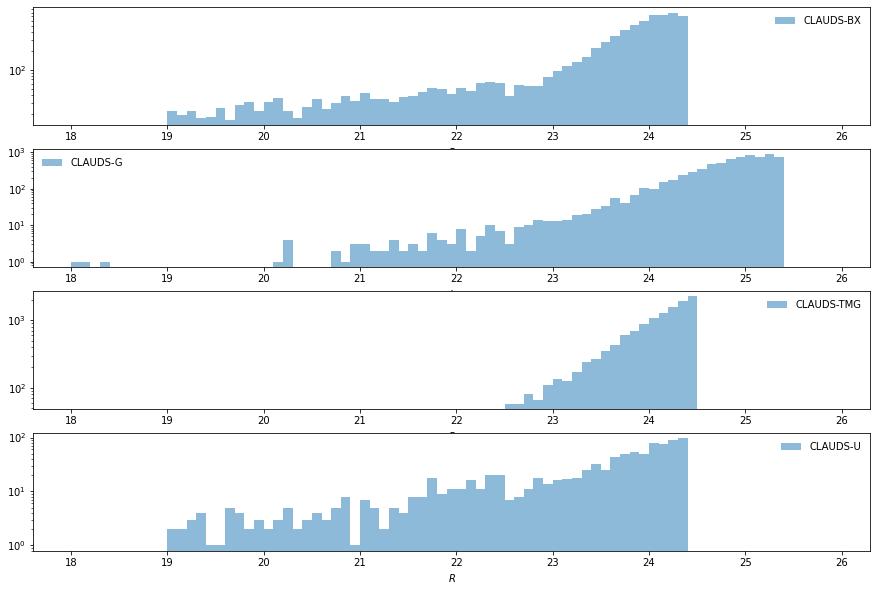

In [59]:
bins = np.arange(18., 26., 0.1)

fig, axes = plt.subplots(4, 1, figsize=(15, 10))

for i, (ss, band) in enumerate(zip(types, ['R', 'I', 'R', 'R'])):
    isin = raw['SAMPLE'] == ss
    
    axes[i].hist(raw[band][isin], bins=bins, label='{}'.format(ss), alpha=0.5)

    axes[i].set_yscale('log')
    axes[i].set_xlabel(r'${}$'.format(band))

    axes[i].legend(frameon=False)